# Importing Libaries

In [185]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation, Conv2D, MaxPool2D, Dense,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing .image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Image Data Agumentation

In [186]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Loading the data and performing data agumentation

In [187]:
x_train = train_datagen.flow_from_directory(r"Dataset\dataset\train",target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test = test_datagen.flow_from_directory(r"Dataset\dataset\test",target_size = (64,64),batch_size = 32,class_mode = "categorical")

train_generator = train_datagen.flow_from_directory(
    r"Dataset\dataset\train",
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse',
    color_mode='grayscale',
)

test_generator = test_datagen.flow_from_directory(
    r"Dataset\dataset\test",
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse',
    color_mode='grayscale',
 
)

Found 10941 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 10941 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [188]:
x_train.class_indices

{'circle': 0, 'square': 1, 'triangle': 2}

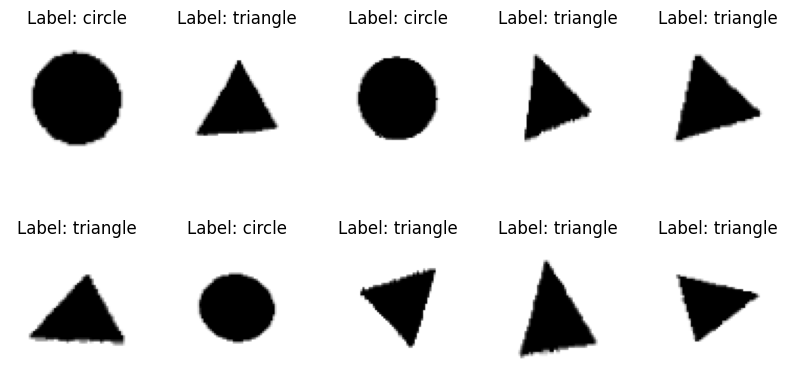

In [189]:
import matplotlib.pyplot as plt

# get the mapping between class indices and their corresponding class names
class_names = list(train_generator.class_indices.keys())

# get a batch of data from the training generator
x_batch, y_batch = next(train_generator)

# convert y_batch to a list of integers
y_batch = y_batch.astype(int).tolist()

# plot the first 10 images in the batch
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_batch[i], cmap='gray')
    class_index = y_batch[i]
    class_name = class_names[class_index]
    ax.set_title('Label: {}'.format(class_name))
    ax.axis('off')
    if i == 9:
        break

plt.show()


# Building the Model

In [190]:
model = Sequential()
model.add(Conv2D(input_shape=(64,64,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=3, activation="softmax")) 

In [191]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 64, 64, 64)        640       
                                                                 
 conv2d_22 (Conv2D)          (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 16384)            

# Compile and Fit the Model

### Set CallBack
The training loop will be checked at end of every epoch for whether the loss is no longer decreasing. Once it's found no longer decreasing, the training terminates. This prevents overfitting 

patience indicates the number of epochs with no improvement after which training will be stopped.
monitor indicates the quantity to be monitored. In this case, it will be the loss

In [192]:
#set callback
callback = EarlyStopping(monitor='val_loss', patience=5)

# monitor: Quantity to be monitored.
# patience: Number of epochs with no improvement after which training will be stopped.

In [193]:
model.compile(optimizer= "adam",loss = "sparse_categorical_crossentropy" , metrics =["accuracy"])


In [194]:
model_history = model.fit(train_generator, epochs = 10 , validation_data = test_generator,validation_steps = 10,callbacks=[callback])

Epoch 1/10
342/342 [==============================] - 63s 182ms/step - loss: 0.1191 - accuracy: 0.9518 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 2/10
342/342 [==============================] - 13s 39ms/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 2.0895e-05 - val_accuracy: 1.0000
Epoch 3/10
342/342 [==============================] - 14s 41ms/step - loss: 8.2925e-04 - accuracy: 0.9999 - val_loss: 1.5410e-06 - val_accuracy: 1.0000
Epoch 4/10
342/342 [==============================] - 14s 41ms/step - loss: 7.8367e-04 - accuracy: 0.9999 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/10
342/342 [==============================] - 14s 40ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 6.4825e-04 - val_accuracy: 1.0000
Epoch 6/10
342/342 [==============================] - 14s 40ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 1.9773e-05 - val_accuracy: 1.0000
Epoch 7/10
342/342 [==============================] - 14s 40ms/step - loss: 0.0012 - accuracy: 0.9997 - val_los

### Plot Accuracy & Loss Graph Function

### Evaluate the model

In [195]:
# Evaluate the model on the training dataset
train_loss, train_accuracy = model.evaluate(train_generator)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)


342/342 [==============================] - 13s 37ms/step - loss: 1.6531e-04 - accuracy: 0.9999
Training Loss: 0.00016531333676539361
Training Accuracy: 0.9999086260795593
10/10 [==============================] - 0s 24ms/step - loss: 7.9473e-10 - accuracy: 1.0000
Testing Loss: 7.947285607379229e-10
Testing Accuracy: 1.0


### Confusion Matrix

10/10 [==============================] - 0s 24ms/step


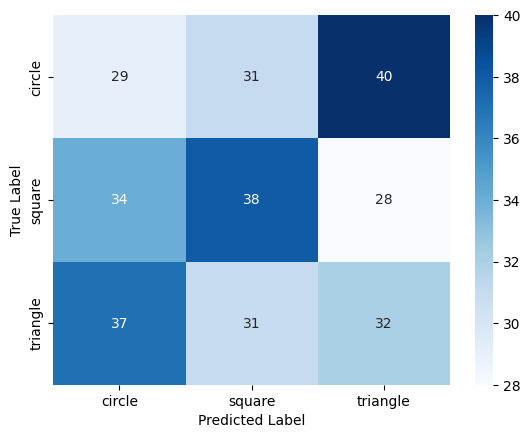

In [196]:
# Get the true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Saving our model

In [197]:
model.save(r"C:\Users\gohee\Desktop\PentaAI\Flask\shapes.h5")

In [198]:
model = load_model(r"C:\Users\gohee\Desktop\PentaAI\Flask\shapes.h5")

# Predicting

In [199]:
img1 = image.load_img(r"Dataset\dataset\test\circle\0.png", color_mode='grayscale',target_size = (64,64))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)  # Add an extra dimension to the input data

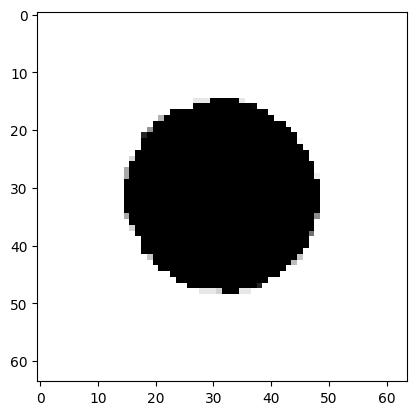

In [200]:
# Display the image
plt.imshow(img1, cmap='gray')
plt.show()

In [201]:
x.shape

(1, 64, 64, 1)

In [202]:
prediction = model.predict(x)

1/1 [==============================] - 0s 99ms/step


In [203]:
predicted_class = np.argmax(prediction)

In [204]:
predicted_class

0

In [205]:
img2 = image.load_img(r"Dataset\dataset\test\square\0.png", color_mode='grayscale',target_size = (64,64))
x = image.img_to_array(img2)
x = np.expand_dims(x, axis=0)  # Add an extra dimension to the input data

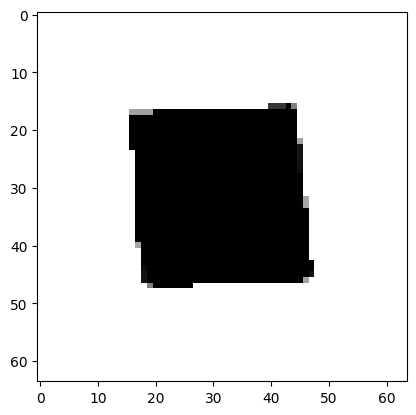

In [206]:
# Display the image
plt.imshow(img2, cmap='gray')
plt.show()

In [207]:
prediction = model.predict(x)

1/1 [==============================] - 0s 29ms/step


In [208]:
predicted_class = np.argmax(prediction)

In [209]:
predicted_class

1

In [210]:
x_train.class_indices

{'circle': 0, 'square': 1, 'triangle': 2}

In [211]:
img3 = image.load_img(r"Dataset\dataset\test\triangle\0.png", color_mode='grayscale',target_size = (64,64))
x = image.img_to_array(img3)
x = np.expand_dims(x, axis=0)  # Add an extra dimension to the input data

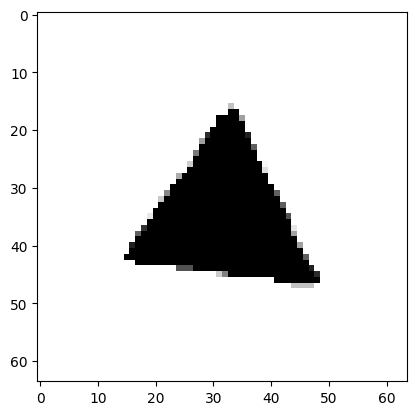

In [212]:
# Display the image
plt.imshow(img3, cmap='gray')
plt.show()

In [213]:
prediction = model.predict(x)

1/1 [==============================] - 0s 30ms/step


In [214]:
predicted_class = np.argmax(prediction)

In [215]:
predicted_class

2

In [216]:
x_train.class_indices

{'circle': 0, 'square': 1, 'triangle': 2}